<a href="https://colab.research.google.com/github/mccorgut/proyectos_IA_Big_Data/blob/main/Titanic_EDA_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análisis Exploratorio de Datos: Dataset Titanic
### Autor: Maria del Carmen Cordoba
### Fecha: Enero 2025

Con este cuaderno veremos como hacer análisis exploratorio de datos utilizando el dataset Titanic.

In [ ]:
# Importación de librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

# Configuración de visualización
sns.set_palette('husl')
pd.set_option('display.max_columns', None)

## 1. Carga de datos
Cargamos el dataset Titanic desde un repositorio público en GitHub, de forma alternativa puedes bajar el fichero adjunto en el ejercicio y utilizarlo.

Las características que contiene son las siguientes:

- PassengerId: Identificación del pasajero
- Survived: Sobrevivió
- Pclass: Clase del pasajero
- Name: Nombre
- Sex: Sexo
- Age: Edad
- SibSp: Número de hermanos/cónyuges a bordo
- Parch: Número de padres/hijos a bordo
- Ticket: Número de ticket
- Fare: Tarifa
- Cabin: Cabina
- Embarked: Embarcó (puerto de origen)

In [ ]:
print('1. Cargando el dataset Titanic...')
df = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')

1. Cargando el dataset Titanic...


## 2. Exploración inicial
Mostramos los primeros registros del dataset y obtenemos información general sobre sus columnas.

In [ ]:
print('\n2. Primeros registros del dataset:')
display(df.head())

print('\n3. Información del dataset:')
display(df.info())

print('\n4. Estadísticas descriptivas:')
display(df.describe())


2. Primeros registros del dataset:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S



3. Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


None


4. Estadísticas descriptivas:


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## 3. Análisis de valores nulos
Visualizamos y analizamos los valores nulos en las columnas del dataset.


5. Análisis de valores nulos:


,Columna,Tipo de Dato,Valores Nulos,Porcentaje Nulos
Cabin,Cabin,object,687,77.10
Age,Age,float64,177,19.87
Embarked,Embarked,object,2,0.22
PassengerId,PassengerId,int64,0,0.00
Survived,Survived,int64,0,0.00
Pclass,Pclass,int64,0,0.00
Name,Name,object,0,0.00
Sex,Sex,object,0,0.00
SibSp,SibSp,int64,0,0.00
Parch,Parch,int64,0,0.00


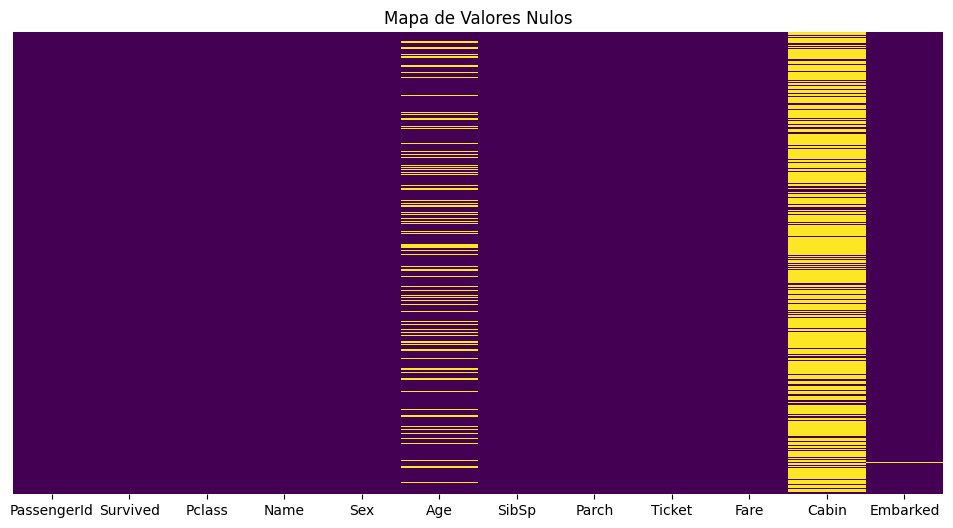

In [ ]:
print('\n5. Análisis de valores nulos:')

def analizar_nulos(df):
    nulos = pd.DataFrame({
        'Columna': df.columns,
        'Tipo de Dato': df.dtypes,
        'Valores Nulos': df.isnull().sum(),
        'Porcentaje Nulos': (df.isnull().sum() / len(df) * 100).round(2)
    })
    return nulos.sort_values('Valores Nulos', ascending=False)

display(analizar_nulos(df))

# Visualización de valores nulos
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.title('Mapa de Valores Nulos')
plt.show()

## 4. Análisis de variables numéricas
Exploramos las columnas numéricas seleccionadas, mostrando su distribución y estadísticas descriptivas.

Vamos a utilizar un diagrama Boxplot (o diagrama de caja y bigotes) este diagrama nos resume la distribución de un conjunto de datos numéricos de forma gráfica resaltando sus características principales. Es muy útil porque ayuda a identificar tendencias centrales, dispersión, y posibles outliers.


6. Análisis de variables numéricas:


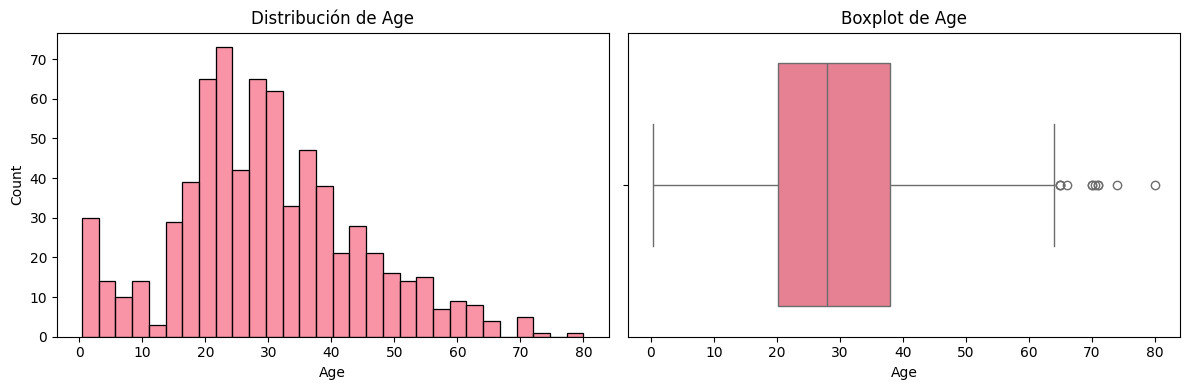


Estadísticas para Age:


,Age
count,714.000000
mean,29.699118
std,14.526497
min,0.420000
25%,20.125000
50%,28.000000
75%,38.000000
max,80.000000


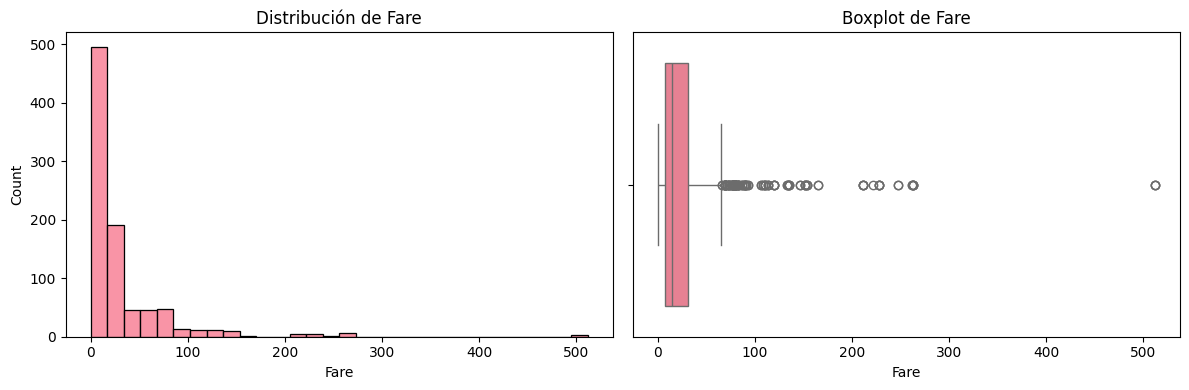


Estadísticas para Fare:


,Fare
count,891.000000
mean,32.204208
std,49.693429
min,0.000000
25%,7.910400
50%,14.454200
75%,31.000000
max,512.329200


In [ ]:
print('\n6. Análisis de variables numéricas:')

def analizar_numericas(df, columnas_numericas):
    for col in columnas_numericas:
        plt.figure(figsize=(12, 4))

        # Histograma
        plt.subplot(1, 2, 1)
        sns.histplot(data=df, x=col, bins=30)
        plt.title(f'Distribución de {col}')

        # Boxplot
        plt.subplot(1, 2, 2)
        sns.boxplot(data=df, x=col)
        plt.title(f'Boxplot de {col}')

        plt.tight_layout()
        plt.show()

        # Estadísticas descriptivas
        print(f'\nEstadísticas para {col}:')
        display(df[col].describe())

columnas_numericas = ['Age', 'Fare']
analizar_numericas(df, columnas_numericas)

## 5. Análisis de variables categóricas
Analizamos la distribución de las variables categóricas mediante gráficos de barras y tablas de frecuencias.


7. Análisis de variables categóricas:


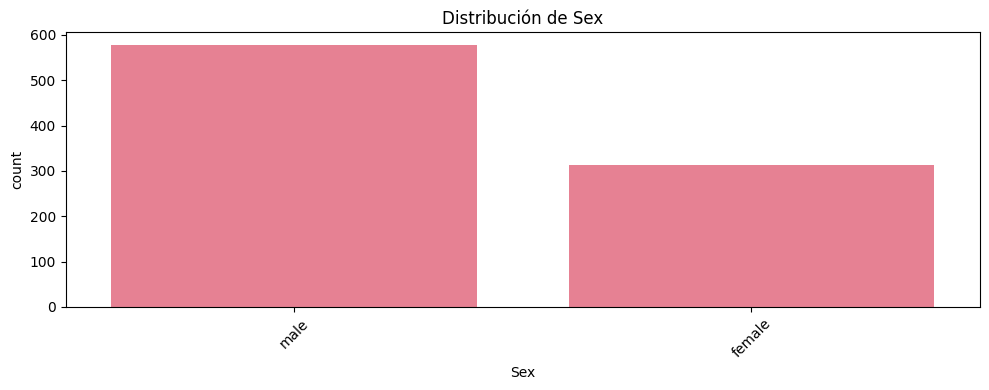


Frecuencias para Sex:


,count
Sex,
male,577
female,314


Porcentajes para Sex:


,proportion
Sex,
male,64.8
female,35.2


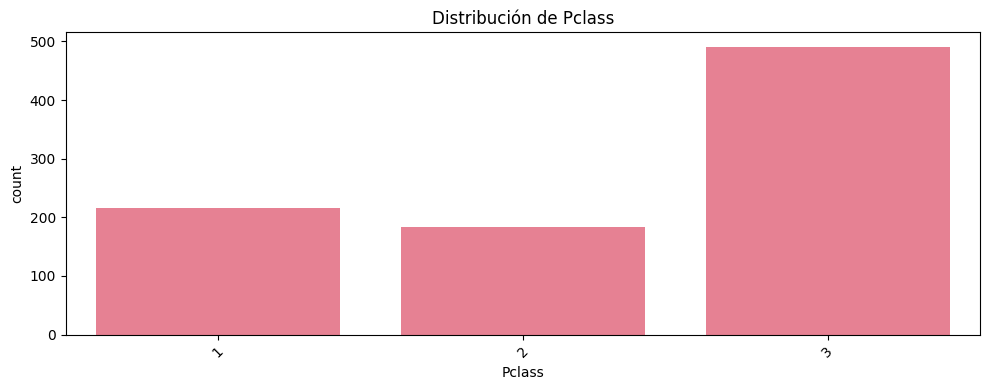


Frecuencias para Pclass:


,count
Pclass,
3,491
1,216
2,184


Porcentajes para Pclass:


,proportion
Pclass,
3,55.1
1,24.2
2,20.7


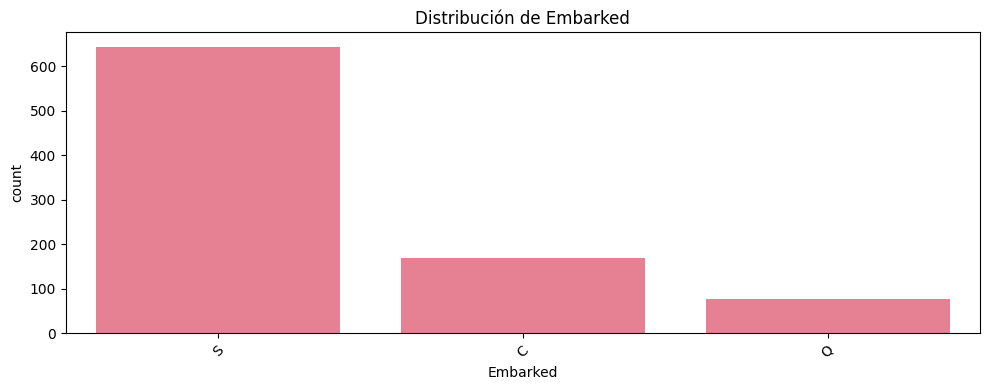


Frecuencias para Embarked:


,count
Embarked,
S,644
C,168
Q,77


Porcentajes para Embarked:


,proportion
Embarked,
S,72.4
C,18.9
Q,8.7


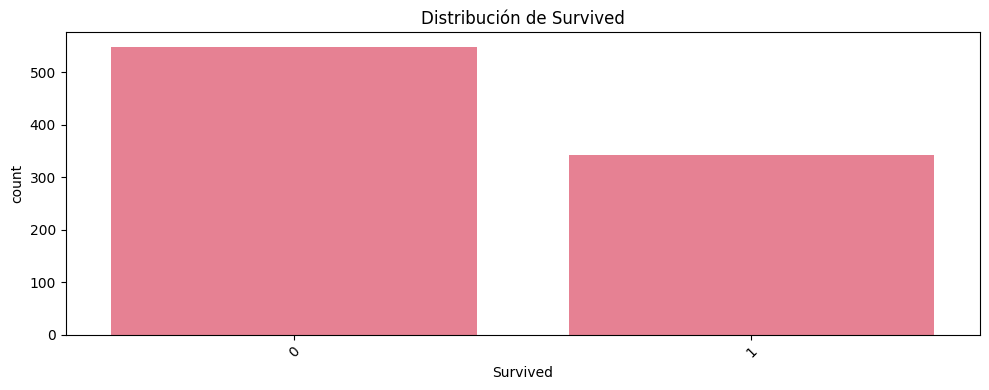


Frecuencias para Survived:


,count
Survived,
0,549
1,342


Porcentajes para Survived:


,proportion
Survived,
0,61.6
1,38.4


In [ ]:
print('\n7. Análisis de variables categóricas:')

def analizar_categoricas(df, columnas_categoricas):
    for col in columnas_categoricas:
        plt.figure(figsize=(10, 4))

        # Gráfico de barras
        sns.countplot(data=df, x=col)
        plt.title(f'Distribución de {col}')
        plt.xticks(rotation=45)

        plt.tight_layout()
        plt.show()

        # Frecuencias
        print(f'\nFrecuencias para {col}:')
        display(df[col].value_counts())
        print(f'Porcentajes para {col}:')
        display(df[col].value_counts(normalize=True).round(3) * 100)

columnas_categoricas = ['Sex', 'Pclass', 'Embarked', 'Survived']
analizar_categoricas(df, columnas_categoricas)

## 6. Análisis de relaciones entre variables
Utilizamos gráficos para observar las correlaciones y relaciones entre distintas variables del dataset.

Interpretación de la matriz de correlación:
- Positivo: A medida que una variable aumenta, la otra también tiende a aumentar.
- Negativo: A medida que una variable aumenta, la otra tiende a disminuir.
- 1 o -1: Correlación perfecta (positiva o negativa).
- Cercano a 0: Relación débil o nula.
- Rojo intenso o cálido (en este caso): Fuerte correlación positiva.
- Azul intenso o frío: Fuerte correlación negativa.
- La diagonal principal siempre tiene el valor de 1, porque cada variable está perfectamente correlacionada consigo misma.


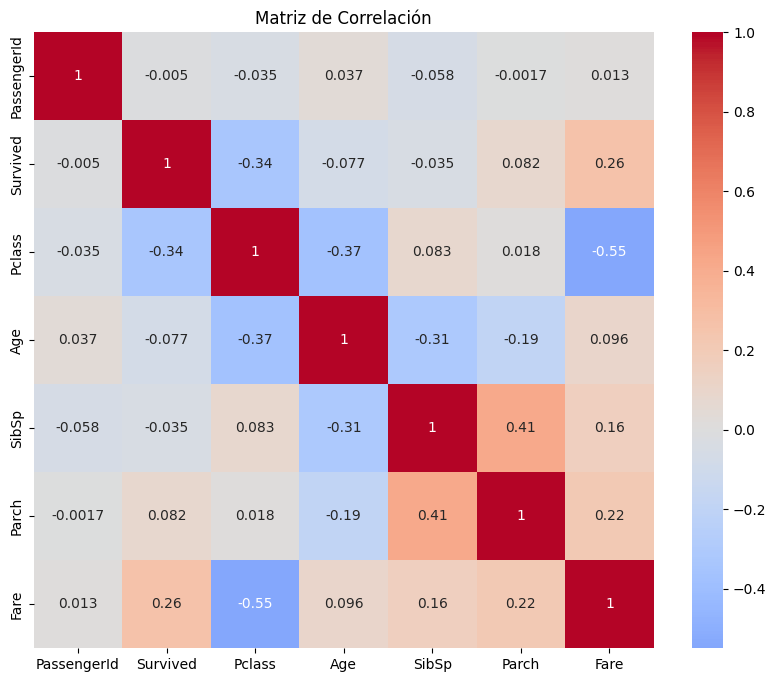

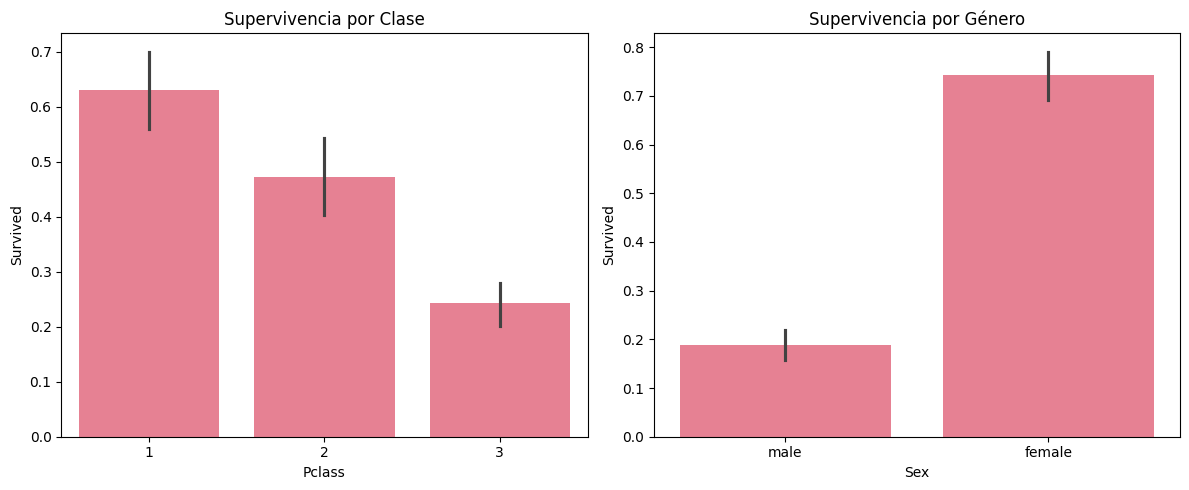

In [ ]:
# Matriz de correlación
plt.figure(figsize=(10, 8))
correlaciones = df.select_dtypes(include=[np.number]).corr()
sns.heatmap(correlaciones, annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de Correlación')
plt.show()

# Supervivencia por clase y género
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.barplot(data=df, x='Pclass', y='Survived')
plt.title('Supervivencia por Clase')

plt.subplot(1, 2, 2)
sns.barplot(data=df, x='Sex', y='Survived')
plt.title('Supervivencia por Género')
plt.tight_layout()
plt.show()

## 7. Tareas guiadas para hacer

1. Crear un gráfico que muestre la supervivencia por rango de edad.
- Crear una nueva columna para agrupar las edades en rangos
  - df['Age_Range'] = pd.cut(df['Age'], bins=[0, 10, 20, 30, 40, 50, 60, 70, 80], labels=['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80'])
- Calcular supervivencia por rango de edad: Agrupar "Age_Range" (usando df.groupby) por "Survived" y coger la media (mean)
- Usar plt y sns, como en los ejemplos anteriores para construir una gráfica:
  - Utilizar sns.barplot para crear un gráfico de barras, x=age_survival.index, y=age_survival.values, palette='viridis'
  - Poner un título al gráfico, al eje x y al eje y y mostrar

2. Calcular el precio promedio del ticket por clase.

- Crear una nueva columna para agrupar llamada ticket_mean y que agrupe por 'Pclass' (clase) los 'Fare' (tarifas)
- Imprimir ticket_mean
- Usar sns.barplot con x=ticket_mean.index, y=ticket_mean.values y palette='coolwarm'
- Dar nombres a la gráfica, eje x y eje y y mostrar.

3. ¿Qué porcentaje de menores de edad (age < 18) sobrevivió comparado con adultos?

- Filtrar menores y adultos, por ejemplo menores = df[df['Age'] < 18]
- Calcular porcentaje de supervivencia para menores y adultos, por ejemplo: supervivencia_menores = menores['Survived'].mean() * 100
- Mostrar los resultados con un print.

4. Crear una visualización que combine al menos tres variables (por ejemplo: clase, género y supervivencia).
- Utilizar:
```
plt.figure(figsize=(10, 8))
sns.histplot(
    data=df,
    x='Pclass',
    hue='Survived',
    multiple='dodge',
    shrink=0.8,
    palette='coolwarm',
    hue_order=[1, 0],
    element='bars'
)
sns.despine()
```
- Dar nombres a la gráfica, eje x y eje y y mostrar.

##1. Crear un gráfico que muestre la supervivencia por rango de edad.


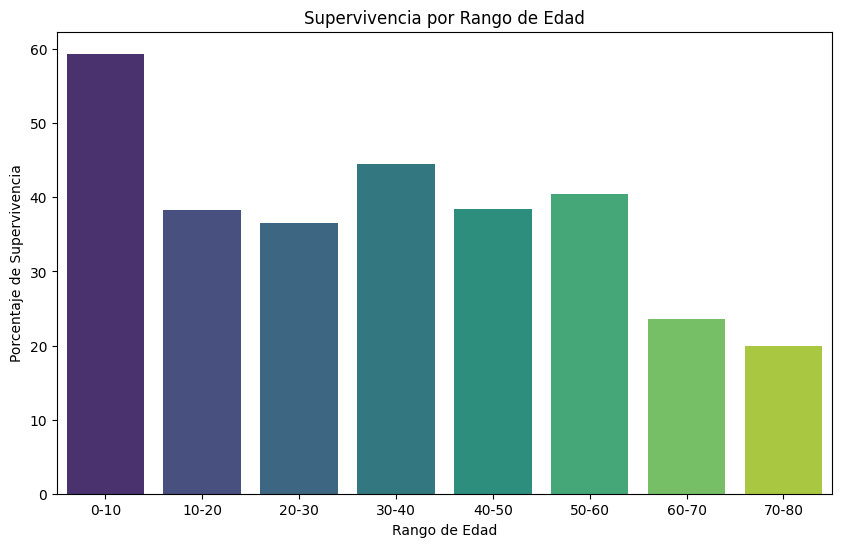

In [ ]:
# Crear una nueva columna para agrupar las edades en rangos
df['Age_Range'] = pd.cut(df['Age'], bins=[0, 10, 20, 30, 40, 50, 60, 70, 80], labels=['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80'])

# Calcular supervivencia por rango de edad: Agrupar "Age_Range" (usando df.groupby) por "Survived" y coger la media (mean)
age_survival = df.groupby('Age_Range', observed=False)['Survived'].mean() * 100 # observed=False se usa para evitar el warning de pandas, al parecer esta a punto de cambiar la sintaxis el codigo se comporta igual simplemente se usa para evitar el warning

# print(age_survival)

# Grafica de la supervivencia por rango de edad
plt.figure(figsize=(10, 6))
sns.barplot(x=age_survival.index, y=age_survival.values, hue=age_survival.index, palette='viridis') # hue=age_survival.index es tambien para evitar un warning de seaborn
plt.title('Supervivencia por Rango de Edad')
plt.xlabel('Rango de Edad')
plt.ylabel('Porcentaje de Supervivencia')
plt.show()

##2. Calcular el precio promedio del ticket por clase.

Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64


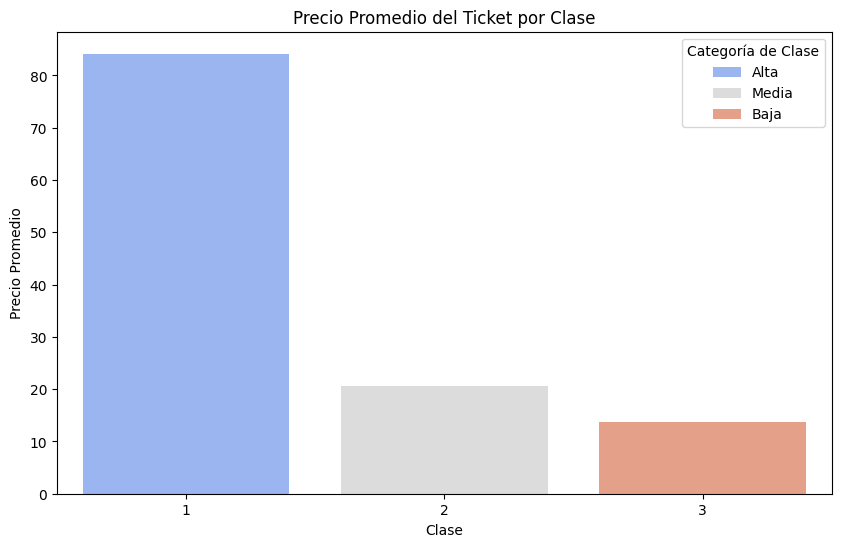

In [ ]:
# Crear una nueva columna para agrupar llamada ticket_mean y que agrupe por 'Pclass' (clase) los 'Fare' (tarifas)
tikect_mean = df.groupby('Pclass', observed=False)['Fare'].mean()

# Imprimir ticket_mean
print(tikect_mean)

# Nueva columna que clasifica el precio promedio del ticket en baja, media, alta
tikect_class = tikect_mean.copy()
# tikect_class = tikect_class.apply(lambda x: 'Baja' if x < 10 else ('Media' if x < 30 else 'Alta'))
tikect_class = tikect_class.apply(lambda x: 'Baja' if x <= 15 else ('Media' if x <= 50 else 'Alta'))

# Nueva columna 'Ticket Class'
df['Ticket_Class'] = df['Pclass'].map(tikect_class)
# print(df[['Pclass', 'Ticket_Class']].head())

# Grafica del precio promedio del ticket por clase
plt.figure(figsize=(10, 6))
sns.barplot(x=tikect_mean.index, y=tikect_mean.values, hue=tikect_class[tikect_mean.index], palette='coolwarm')
plt.title('Precio Promedio del Ticket por Clase')
plt.xlabel('Clase')
plt.ylabel('Precio Promedio')
plt.legend(title='Categoría de Clase')
plt.show()

##3. ¿Qué porcentaje de menores de edad (age < 18) sobrevivió comparado con adultos?

In [ ]:
# Filtrar menores y adultos, por ejemplo menores = df[df['Age'] < 18]
menores = df[df['Age'] < 18]
adultos = df[df['Age'] >= 18]

# Calcular porcentaje de supervivencia para menores y adultos, por ejemplo: supervivencia_menores = menores['Survived'].mean() * 100
supervivencia_menores = menores['Survived'].mean() * 100
supervivencia_adultos = adultos['Survived'].mean() * 100

# Mostrar los resultados con un print.
print(f'Porcentaje de supervivencia de menores: {supervivencia_menores:.2f}%')
print(f'Porcentaje de supervivencia de adultos: {supervivencia_adultos:.2f}%')

Porcentaje de supervivencia de menores: 53.98%
Porcentaje de supervivencia de adultos: 38.10%


##4.Crear una visualización que combine al menos tres variables (por ejemplo: clase, género y supervivencia).

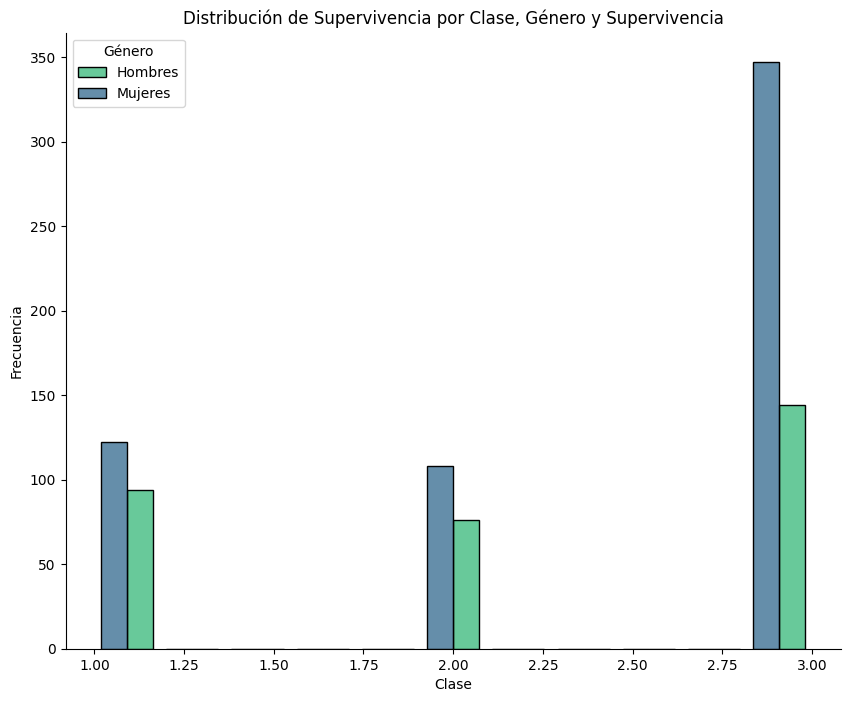

In [ ]:
# Visualización combinada de clase, género y supervivencia
plt.figure(figsize=(10, 8))
sns.histplot(
    data=df,
    x='Pclass',
    hue='Sex',
    multiple='dodge',
    shrink=0.8,
    palette='viridis',
    hue_order=['male', 'female'],
    element='bars'
)
sns.despine()

plt.legend(title='Género', labels=['Hombres', 'Mujeres'])

sns.despine()
plt.title('Distribución de Supervivencia por Clase, Género y Supervivencia')
plt.xlabel('Clase')
plt.ylabel('Frecuencia')
plt.show()


##Cosas extras que me ha dado por hacer
- Repersentar el indice de supervivencia de las diferentes clases sociales en funcion del promedio del precio del ticket (Fare)
- Para hacerlo añado una nueva columna que clasifique a cada clase en una categoria (baja, media, alta)
- Se me ha ocurrido hacer esta representacion porque por lo que tengo entendido en la tragedia del titanic sobrevivieron mas pasajeros de clases altas
- Debido a entre otros factores, sus camarotes estaban mas cerca de los botes salvavidas

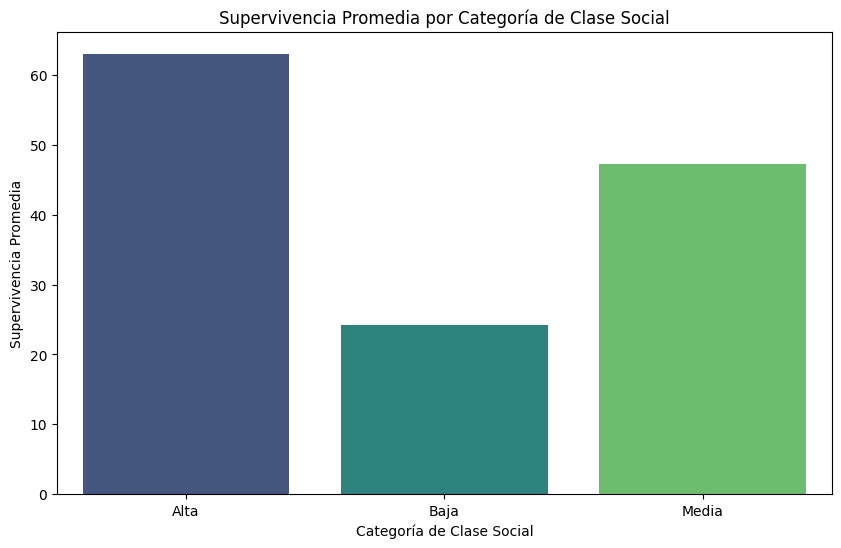

In [ ]:
# Calcula la supervivencia promedio por categoría de clase social (Ticket_Class)
survival_by_class = df.groupby('Ticket_Class')['Survived'].mean() * 100

# Calcula el precio promedio del ticket por clase
ticket_mean = df.groupby('Pclass')['Fare'].mean() * 100

# Nueva columna que clasifica el precio promedio del ticket en baja, media, alta
tikect_class = tikect_mean.copy()
# tikect_class = tikect_class.apply(lambda x: 'Baja' if x < 10 else ('Media' if x < 30 else 'Alta'))
tikect_class = tikect_class.apply(lambda x: 'Baja' if x <= 15 else ('Media' if x <= 50 else 'Alta'))

# Nueva columna 'Ticket Class'
df['Ticket_Class'] = df['Pclass'].map(tikect_class)
# print(df[['Pclass', 'Ticket_Class']].head())

# Gráfico de barras para mostrar la relación entre supervivencia y clase social
plt.figure(figsize=(10, 6))
sns.barplot(x=survival_by_class.index, y=survival_by_class.values, hue=survival_by_class.index, palette='viridis')
plt.title('Supervivencia Promedia por Categoría de Clase Social')
plt.xlabel('Categoría de Clase Social')
plt.ylabel('Supervivencia Promedia')
plt.show()
